## Meta-Critic Whisky Database - Exploration and predictions

#### Visualisation and exploration of whisky database from https://whiskyanalysis.com/index.php/database/

#### 1. Getting started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#### 2. Read data into pandas

In [3]:
df = pd.read_csv('whisky_analysis.csv')

#### 3. Look at the data

In [4]:
df.head()

,Whisky,Meta Critic,STDEV,#,Cost,Class,Super Cluster,Cluster,Country,Type
0,Ledaig 42yo Dusgadh,9.47,0.25,3,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
1,Glenfarclas 40yo,9.28,0.26,15,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
2,Glengoyne 25yo,9.21,0.23,14,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
3,Amrut Spectrum (Batch 1),9.19,0.24,10,$$$$$,SingleMalt-like,ABC,C,India,Malt
4,Highland Park 25yo,9.18,0.17,14,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt


In [5]:
#get rid of the spaces!
df.rename(columns={'Meta Critic':'Score','Super Cluster':'Super_Cluster'}, inplace=True)

In [6]:
# replace special character $ with £ 
df.Cost = df.Cost.str.replace('$','£')

In [7]:
df.head(2)

,Whisky,Score,STDEV,#,Cost,Class,Super_Cluster,Cluster,Country,Type
0,Ledaig 42yo Dusgadh,9.47,0.25,3,£££££+,SingleMalt-like,ABC,C,Scotland,Malt
1,Glenfarclas 40yo,9.28,0.26,15,£££££+,SingleMalt-like,ABC,A,Scotland,Malt


In [8]:
df.describe()

,Score,STDEV,#
count,1454.000000,1454.000000,1454.000000
mean,8.540199,0.372999,10.127235
std,0.390641,0.182573,5.671888
min,6.470000,0.020000,3.000000
25%,8.320000,0.260000,5.000000
50%,8.590000,0.340000,9.000000
75%,8.810000,0.450000,14.000000
max,9.470000,1.870000,28.000000


In [9]:
df.tail()

,Whisky,Score,STDEV,#,Cost,Class,Super_Cluster,Cluster,Country,Type
1449,Jim Beam White Label,7.66,0.48,19,£,Bourbon-like,NaN,R2,USA,Bourbon
1450,Rebel Yell Kentucky Bourbon,7.46,0.54,12,£,Bourbon-like,NaN,R0,USA,Bourbon
1451,Jim Beam Red Stag (Black Cherry),7.43,0.95,4,£,Bourbon-like,NaN,NaN,USA,Flavoured
1452,Virginia Black,7.32,1.08,6,££,Bourbon-like,NaN,R2,USA,Bourbon
1453,Laphroaig Cairdeas 2018 Fino,9.00,0.13,4,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(1454, 10)

##### Distributions of different series

Text(0,0.5,'Frequency')

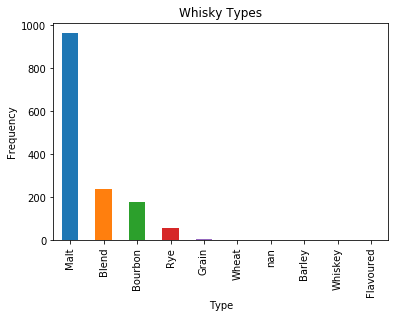

In [11]:
ax = df.Type.value_counts(dropna = False).plot.bar(title = 'Whisky Types')
ax.set_xlabel("Type")
ax.set_ylabel("Frequency")

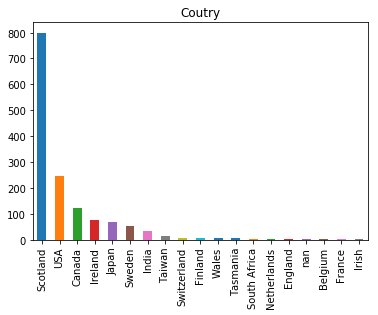

In [12]:
df.Country.value_counts(dropna = False).plot.bar(title = 'Coutry')

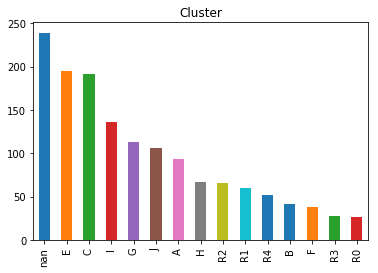

In [13]:
df.Cluster.value_counts(dropna = False).plot.bar(title = 'Cluster')

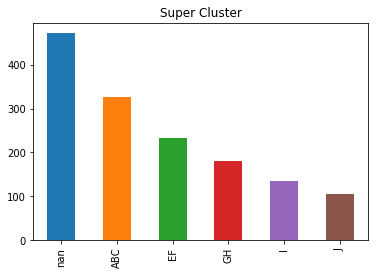

In [14]:
df['Super_Cluster'].value_counts(dropna = False).plot.bar(title = 'Super Cluster')

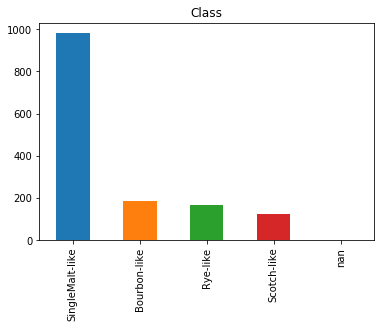

In [15]:
df.Class.value_counts(dropna = False).plot.bar(title = 'Class')

In [16]:
df.Cost.value_counts(dropna = False)

££££      467
£££££     293
£££       281
££        179
£££££+    145
£          87
NaN         2
Name: Cost, dtype: int64

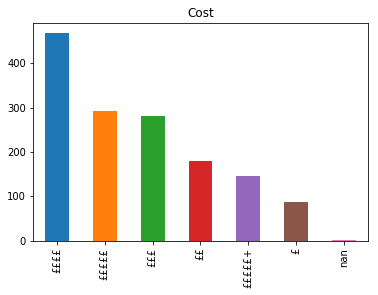

In [17]:
df.Cost.value_counts(dropna = False).plot(kind = 'bar', title = 'Cost')

##### Histograms of Meta Critic scores

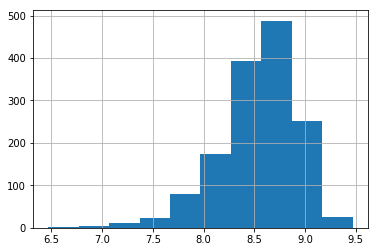

In [18]:
# for whole population
df.Score.hist()

##### Meta Critic distributions for differnet countries

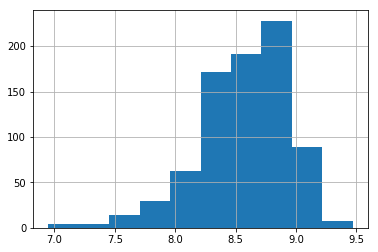

In [19]:
#Scotland
df.Score[df.Country == 'Scotland'].hist()

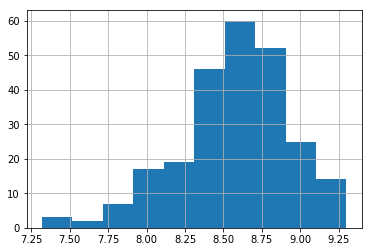

In [20]:
#USA
df.Score[df.Country == 'USA'].hist()

##### Mean Meta Critic Scores by different series

In [21]:
# Change figsize
fig_size = plt.rcParams["figure.figsize"]
#print ("Current size:", fig_size)
fig_size[0] = 6
fig_size[1] = 4

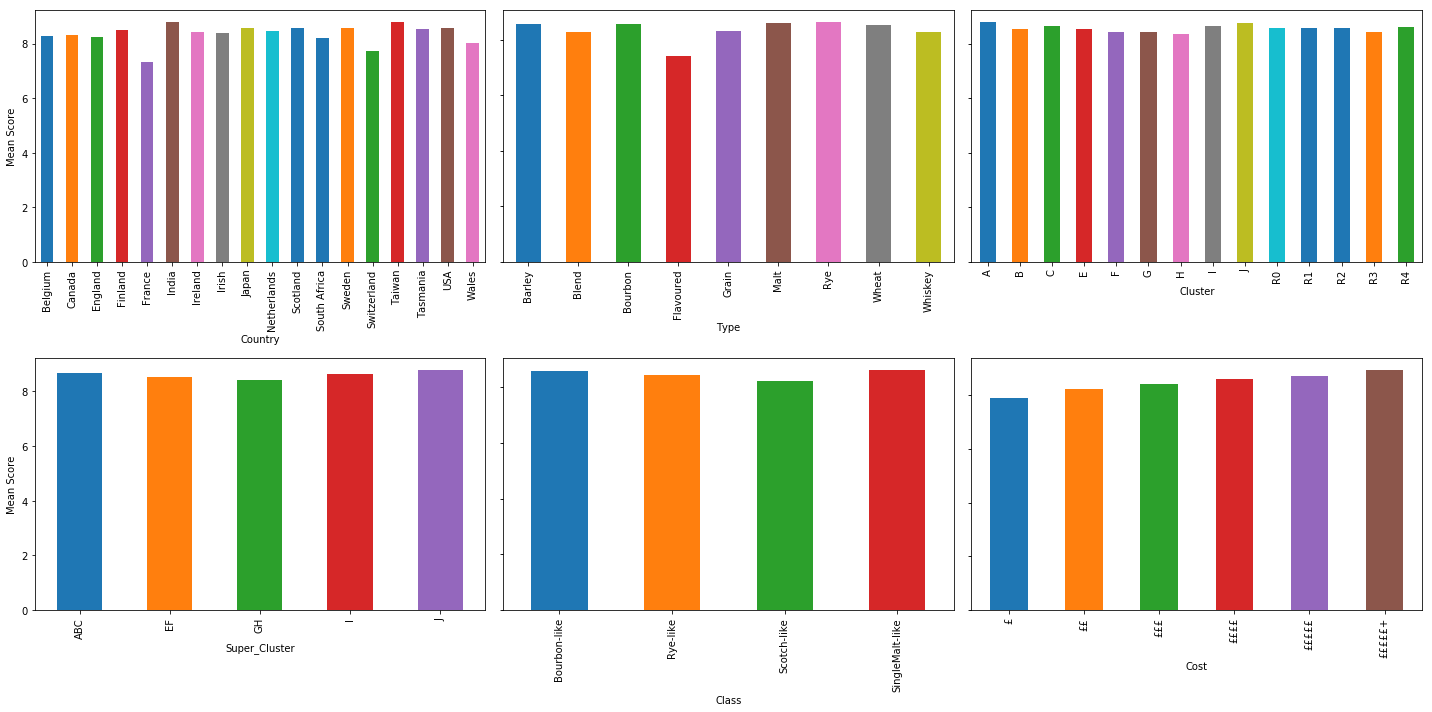

In [22]:
cols = ['Country','Type','Cluster','Super_Cluster','Class','Cost']
for i, value in enumerate(cols):
    plt.tight_layout()
    plt.subplot(2,3, i+1)
    df.groupby(value)['Score'].mean().plot.bar(sharey = 'row', figsize = (20,10)).set_ylabel('Mean Score')

#### Comments so far:
- 1453 Whiskies!
- Scottish malts significantly the most common
- Single malts by far the most common type

##### What indicators are there about predicting the score?
- French and Swiss whiskies have a lower mean!
- Flavoured whiskies have the lowest mean score
- Score increases with price, but not by much!

#### 4. Data preprocessing to run a linear regression model 

In [23]:
# Drop the 'Whisky', 'STDEV' and # columns
df = df.drop(['Whisky', 'STDEV', '#'], axis=1)

In [24]:
df.head()

,Score,Cost,Class,Super_Cluster,Cluster,Country,Type
0,9.47,£££££+,SingleMalt-like,ABC,C,Scotland,Malt
1,9.28,£££££+,SingleMalt-like,ABC,A,Scotland,Malt
2,9.21,£££££+,SingleMalt-like,ABC,A,Scotland,Malt
3,9.19,£££££,SingleMalt-like,ABC,C,India,Malt
4,9.18,£££££+,SingleMalt-like,ABC,C,Scotland,Malt


In [25]:
#Use one hot encoding to vectorise the categorical variables - we will use pandas' get_dummies 
df1 = pd.get_dummies(df, columns = ['Cost', 'Class', 'Country', 'Cluster', 'Super_Cluster', 'Type'])

In [26]:
df1.head()

,Score,Cost_£,Cost_££,Cost_£££,Cost_££££,Cost_£££££,Cost_£££££+,Class_Bourbon-like,Class_Rye-like,Class_Scotch-like,...,Super_Cluster_J,Type_Barley,Type_Blend,Type_Bourbon,Type_Flavoured,Type_Grain,Type_Malt,Type_Rye,Type_Wheat,Type_Whiskey
0,9.47,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,9.28,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,9.21,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,9.19,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9.18,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
y = df1.pop('Score')

In [28]:
y.shape

(1454,)

In [29]:
X = df1

In [30]:
X.shape

(1454, 56)

#### 5. Fit models and make predictions

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [162]:
# the next 3 cells are commented out. An initial trial with the LinearRegression model produced a very large variance and so this was abandoned in favour of the Ridge model
#from sklearn.linear_model import LinearRegression

In [163]:
#reg = LinearRegression().fit(X_train, y_train)

In [164]:
#preds = reg.predict(X_test)

In [ ]:
# use a linear regression model that utilises regularisation
from sklearn.linear_model import Ridge

In [ ]:
# basic trial and error suggests regularization coefficient, alpha = 5.3 is optimal. A more thorough investigation could yield improved performance.
rid = Ridge(alpha = 5.3).fit(X_train, y_train)

In [ ]:
preds = rid.predict(X_test)

In [165]:
preds

array([8.55653287, 8.22759733, 8.7062598 , 8.34773911, 8.19502987,
       8.7062598 , 8.7811306 , 8.25307166, 8.73792726, 8.24950891,
       8.33747416, 8.67279905, 8.60367012, 8.34103691, 8.24950891,
       8.84051694, 8.52416815, 8.73792726, 8.47488645, 8.44580571,
       8.90328791, 8.60723288, 8.8381597 , 8.73792726, 8.64687347,
       8.53854191, 8.5848338 , 8.67279905, 8.63286533, 8.5848338 ,
       8.82399865, 8.60367012, 8.16493469, 8.64687347, 8.51871169,
       8.00655359, 8.33596452, 8.67279905, 8.72523591, 8.00655359,
       8.78506617, 9.01237874, 8.7062598 , 8.16287887, 8.53854191,
       8.55653287, 8.7704923 , 8.8381597 , 8.67279905, 8.84051694,
       8.63452389, 8.71276095, 8.64687347, 8.57084472, 8.8488672 ,
       8.48867376, 8.7111875 , 8.36083307, 8.31764393, 8.51704008,
       8.72523591, 8.71276095, 8.69079   , 8.7811306 , 8.34773911,
       8.85949304, 7.81542027, 8.68974151, 8.7811306 , 8.44580571,
       8.24950891, 8.37586261, 8.7062598 , 8.22759733, 8.57084

#### 6.Evaluate model performance

In [170]:
from sklearn.metrics import mean_absolute_error

In [171]:
mean_absolute_error(y_test, preds)

0.18947744639174896

In [172]:
from sklearn.metrics import r2_score

In [173]:
r2_score(y_test, preds)

0.5888744575791602

#### So we can predict meta-critic scores with an accuracy of approx 0.2!